___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-3 (RNN)<br><br>Product Amount Forecast by Time<br><h1>

# Dataset Info

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

# Indest Data

In [2]:
df = pd.read_csv('/content/Frozen_Dessert_Production.csv',
                index_col='DATE',
                parse_dates=True
                )

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Change the column name as "Production"
2. Plot your data and see its seasonalty

In [3]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764


In [ ]:
df.columns = ["Production"]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 573 entries, 1972-01-01 to 2019-09-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IPN31152N  573 non-null    float64
dtypes: float64(1)
memory usage: 9.0 KB


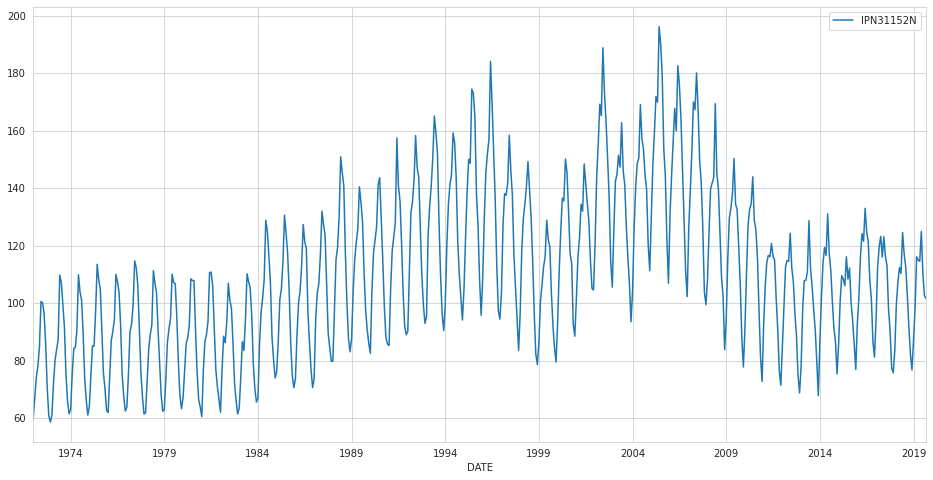

In [5]:
df.plot(figsize=(16,8))

# Preprocessing of Data

## Train Test Split

In [6]:
len(df)

573

In [7]:
test_size = 50

In [8]:
test_ind = len(df) - test_size
test_ind

523

In [9]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [10]:
train

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2015-03-01,109.579
2015-04-01,108.362
2015-05-01,106.058


In [11]:
test

,IPN31152N
DATE,
2015-08-01,112.205
2015-09-01,100.348
2015-10-01,93.932
2015-11-01,85.864
2015-12-01,76.975
2016-01-01,92.811
2016-02-01,101.974
2016-03-01,116.179
2016-04-01,124.211


## Scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()


In [14]:
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

## Time Series Generator

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [16]:
length = 20
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)

In [17]:
len(generator)

503

In [18]:
generator[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221],
         [0.09850931],
         [0.15590133],
         [0.18358944],
         [0.20878908],
         [0.37150354],
         [0.3542551 ],
         [0.29817568]]]), array([[0.23973867]]))

In [19]:
X, y = generator[0]

In [20]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00947104 0.06108982 0.11326273 0.14145625 0.18982663 0.30495972
 0.30154406 0.27416065 0.19736841 0.08532665 0.01561588 0.
 0.01774221 0.09850931 0.15590133 0.18358944 0.20878908 0.37150354
 0.3542551  0.29817568]
Predict this y: 
 [[0.23973867]]


# Modelling & Model Performance

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [22]:
train_scaled.shape

(523, 1)

In [23]:
n_features = train_scaled.shape[1]

## with "tanh" activation function

In [24]:
model = Sequential()
model.add(LSTM(100, activation = 'tanh', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'tanh'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5,restore_best_weights = True)

In [28]:
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [29]:
len(validation_generator)

30

In [30]:
model.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
503/503 [==============================] - 15s 21ms/step - loss: 0.0191 - val_loss: 0.0027
Epoch 2/120
503/503 [==============================] - 10s 19ms/step - loss: 0.0057 - val_loss: 0.0025
Epoch 3/120
503/503 [==============================] - 10s 19ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 4/120
503/503 [==============================] - 10s 20ms/step - loss: 0.0044 - val_loss: 0.0025
Epoch 5/120
503/503 [==============================] - 10s 19ms/step - loss: 0.0040 - val_loss: 0.0023
Epoch 6/120
503/503 [==============================] - 10s 19ms/step - loss: 0.0035 - val_loss: 0.0022
Epoch 7/120
503/503 [==============================] - 10s 19ms/step - loss: 0.0035 - val_loss: 0.0027
Epoch 8/120
503/503 [==============================] - 10s 19ms/step - loss: 0.0036 - val_loss: 0.0024
Epoch 9/120
503/503 [==============================] - 10s 19ms/step - loss: 0.0033 - val_loss: 0.0040
Epoch 10/120
503/503 [==============================] - 10s 20ms/step - l

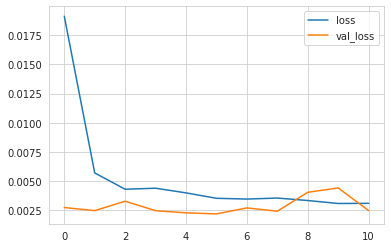

In [31]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

### Evaluation on Test Data

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [33]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [34]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [35]:
predictions_scaled

[array([0.32289687], dtype=float32),
 array([0.25351867], dtype=float32),
 array([0.1929034], dtype=float32),
 array([0.15955335], dtype=float32),
 array([0.16413976], dtype=float32),
 array([0.20165066], dtype=float32),
 array([0.25565892], dtype=float32),
 array([0.3123898], dtype=float32),
 array([0.35567528], dtype=float32),
 array([0.3795433], dtype=float32),
 array([0.37796476], dtype=float32),
 array([0.3486626], dtype=float32),
 array([0.29587856], dtype=float32),
 array([0.23060642], dtype=float32),
 array([0.17597803], dtype=float32),
 array([0.15173246], dtype=float32),
 array([0.16495915], dtype=float32),
 array([0.20691213], dtype=float32),
 array([0.26175493], dtype=float32),
 array([0.3160851], dtype=float32)]

In [36]:
eval_metrics(test_scaled[:length], predictions_scaled)

r2_score: 0.27124140300160904 
mae: 0.08695147879643542 
mse: 0.009676359698215183 
rmse: 0.09836848935617128


### Inverse Transformation and Comparing

In [37]:
predictions = scaler.inverse_transform(predictions_scaled)

In [38]:
compare = test[:20]

In [39]:
compare['Predictions'] = predictions

In [40]:
compare

,IPN31152N,Predictions
DATE,,
2015-08-01,112.205,103.063
2015-09-01,100.348,93.522
2015-10-01,93.932,85.187
2015-11-01,85.864,80.601
2015-12-01,76.975,81.231
2016-01-01,92.811,86.390
2016-02-01,101.974,93.816
2016-03-01,116.179,101.618
2016-04-01,124.211,107.570


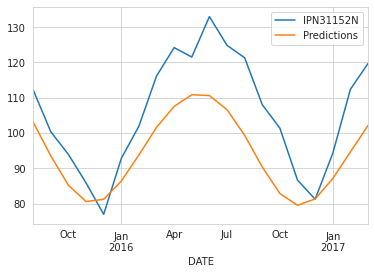

In [41]:
compare.plot()

In [42]:
eval_metrics(compare.IPN31152N, compare.Predictions)

r2_score: 0.27124140300160815 
mae: 11.957036960065148 
mse: 182.9806652988969 
rmse: 13.52703460847561


## with "relu" activation function

In [43]:
model2 = Sequential()
model2.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model2.add(LSTM(50, activation = 'relu'))
model2.add(Dense(1))
model2.compile(optimizer = 'adam', loss = 'mse')

In [44]:
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 20, 100)           40800     
                                                                 
 lstm_3 (LSTM)               (None, 50)                30200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [45]:
model2.fit(x = generator,
          epochs = 120,
          validation_data = validation_generator,
          callbacks = [early_stop])

Epoch 1/120
503/503 [==============================] - 12s 19ms/step - loss: 0.0355 - val_loss: 0.0143
Epoch 2/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0300 - val_loss: 0.0153
Epoch 3/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0204 - val_loss: 0.0069
Epoch 4/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0111 - val_loss: 0.0026
Epoch 5/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0091 - val_loss: 0.0039
Epoch 6/120
503/503 [==============================] - 10s 20ms/step - loss: 0.0081 - val_loss: 0.0031
Epoch 7/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 8/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0065 - val_loss: 0.0025
Epoch 9/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0051 - val_loss: 0.0106
Epoch 10/120
503/503 [==============================] - 9s 18ms/step - loss: 0.0

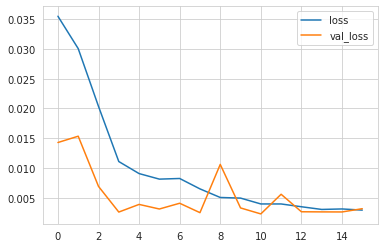

In [46]:
loss_df = pd.DataFrame(model2.history.history)
loss_df.plot()

### Evaluation on Test Data

In [47]:
predictions_scaled = []

first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model2.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis=1)

In [48]:
predictions_scaled

[array([0.31835362], dtype=float32),
 array([0.23037821], dtype=float32),
 array([0.15888982], dtype=float32),
 array([0.11700891], dtype=float32),
 array([0.1236984], dtype=float32),
 array([0.17838943], dtype=float32),
 array([0.25639126], dtype=float32),
 array([0.29172885], dtype=float32),
 array([0.31539977], dtype=float32),
 array([0.3238966], dtype=float32),
 array([0.31333384], dtype=float32),
 array([0.27660066], dtype=float32),
 array([0.22775662], dtype=float32),
 array([0.15421772], dtype=float32),
 array([0.09566577], dtype=float32),
 array([0.06373346], dtype=float32),
 array([0.07125713], dtype=float32),
 array([0.11805127], dtype=float32),
 array([0.17934255], dtype=float32),
 array([0.2104515], dtype=float32)]

In [49]:
eval_metrics(test_scaled[:20], predictions_scaled)

r2_score: -0.7907518804300588 
mae: 0.13898884813032847 
mse: 0.02377736522994971 
rmse: 0.1541991090439556


### Inverse Transformation and Comparing

In [50]:
predictions = scaler.inverse_transform(predictions_scaled)

In [51]:
compare = test[:20]

In [52]:
compare['Predictions'] = predictions

In [53]:
compare

,IPN31152N,Predictions
DATE,,
2015-08-01,112.205,102.438
2015-09-01,100.348,90.340
2015-10-01,93.932,80.509
2015-11-01,85.864,74.750
2015-12-01,76.975,75.670
2016-01-01,92.811,83.191
2016-02-01,101.974,93.917
2016-03-01,116.179,98.777
2016-04-01,124.211,102.032


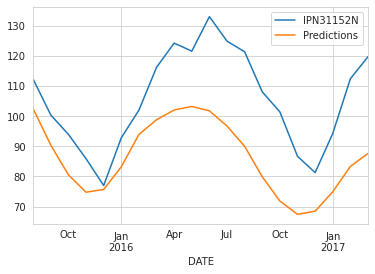

In [54]:
compare.plot()

# Retrain and Forecasting

Select activation function providing a better score, create your final model with full data, forecast for the next 12 months, and plot this forecast.

In [55]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [56]:
generator = TimeseriesGenerator(scaled_full_data, scaled_full_data, length = length, batch_size = batch_size)

In [58]:
model = Sequential()
model.add(LSTM(100, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

model.fit(x = generator, epochs=15)

Epoch 1/15
553/553 [==============================] - 12s 18ms/step - loss: 0.0335
Epoch 2/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0189
Epoch 3/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0093
Epoch 4/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0076
Epoch 5/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0072
Epoch 6/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0058
Epoch 7/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0048
Epoch 8/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0044
Epoch 9/15
553/553 [==============================] - 11s 20ms/step - loss: 0.0038
Epoch 10/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0036
Epoch 11/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0033
Epoch 12/15
553/553 [==============================] - 10s 18ms/step - loss: 0.0030
E

In [59]:
forecast = []

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:, 1:, :], [current_pred], axis = 1)

In [60]:
forecast = scaler.inverse_transform(forecast)
forecast

array([[ 84.55770599],
       [ 75.95698702],
       [ 74.21143869],
       [ 81.97929004],
       [ 96.20352521],
       [106.16674497],
       [113.66171339],
       [119.42920259],
       [120.63618976],
       [116.27231687],
       [105.89145842],
       [ 92.37390216],
       [ 79.746431  ],
       [ 72.19615794],
       [ 71.69901249],
       [ 80.73192708],
       [ 93.68910318],
       [102.90254291],
       [110.93426927],
       [117.85765706]])

In [61]:
df

,IPN31152N
DATE,
1972-01-01,59.962
1972-02-01,67.061
1972-03-01,74.235
1972-04-01,78.112
1972-05-01,84.764
...,...
2019-05-01,114.561
2019-06-01,124.960
2019-07-01,110.263


In [62]:
forecast_index = pd.date_range(start = '1972-01-01', periods = length, freq = 'MS')

In [63]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])

In [64]:
forecast_df

,Forecast
1972-01-01,84.558
1972-02-01,75.957
1972-03-01,74.211
1972-04-01,81.979
1972-05-01,96.204
1972-06-01,106.167
1972-07-01,113.662
1972-08-01,119.429
1972-09-01,120.636
1972-10-01,116.272


In [66]:
df.columns = ["Production"]

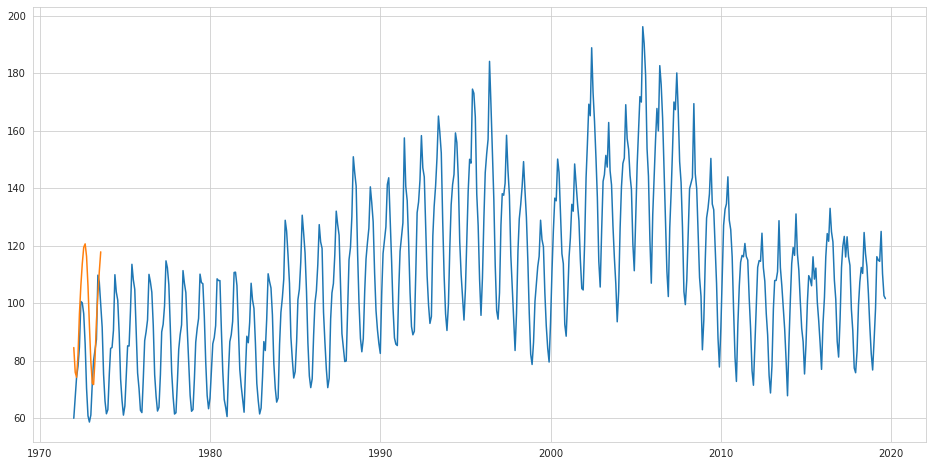

In [67]:
plt.figure(figsize = (16, 8))
plt.plot(df.index, df['Production'])
plt.plot(forecast_df.index, forecast_df['Forecast'])